In [1]:
# pip install numpy pandas scikit-learn xgboost matplotlib seaborn
# pip install xgboost


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
diabetes_dataset = pd.read_csv(r"C:\Users\Stemy\Desktop\disease prediction\Disease_Prediction\dataset\diabetes.csv")

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_dataset.duplicated().sum()

0

In [8]:
# information about dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Calculate the correlation matrix

In [10]:
correlation = diabetes_dataset.corr()
print(correlation['Outcome'].sort_values(ascending=False), '\n')

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64 



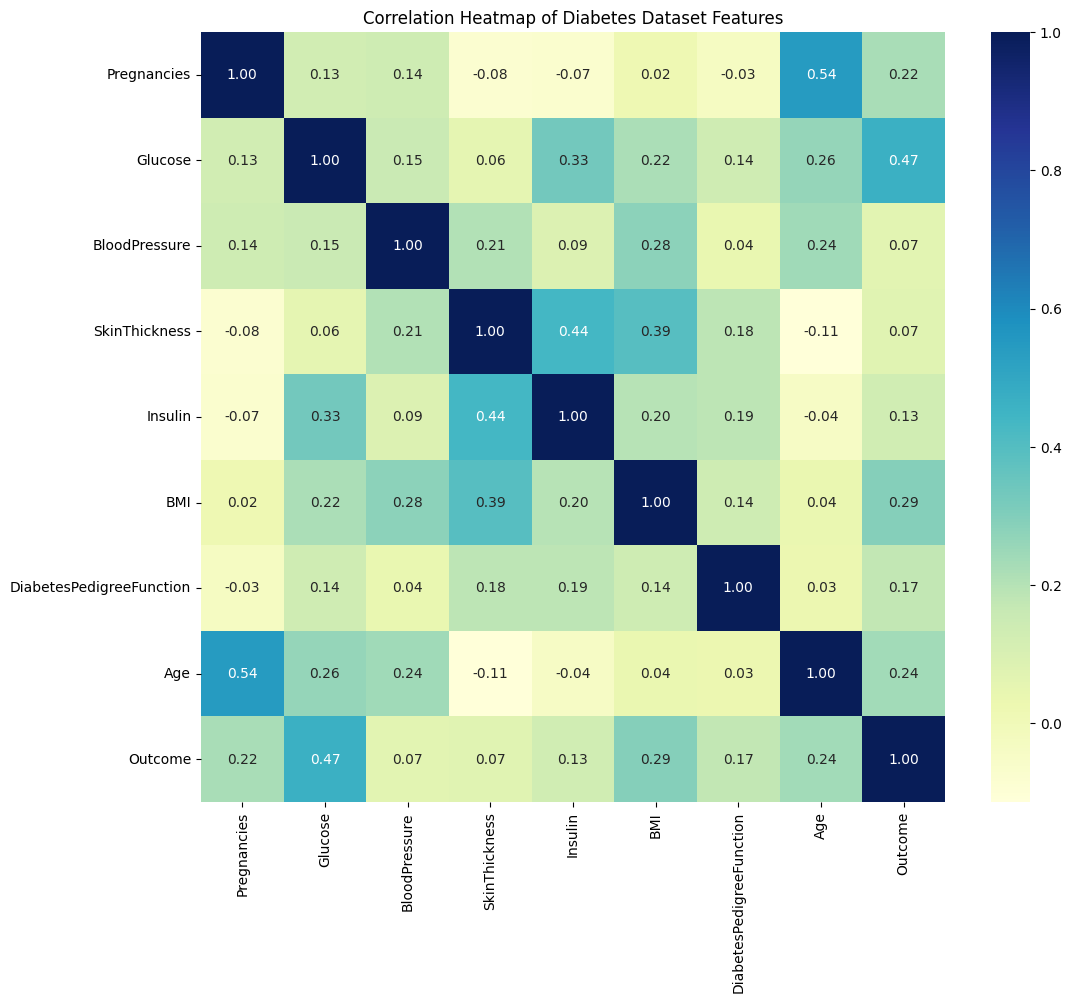

In [11]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f",cmap="YlGnBu")
plt.title('Correlation Heatmap of Diabetes Dataset Features')
plt.show()

##Inferences from the correlation heat map:
The darkest shows positive correaltion will the lighest shows negative correaltion.


1.   Glucose as a feature is has the highest (+ve) correlation 0.466581

2.  BloodPressure as a feature has the highest (-ve) correlation 0.065068



##Outliers

In [12]:
import pandas as pd

# Define a function to list outliers for each feature
def list_outliers(df):
 # Create an empty list to store outlier counts
    outlier_counts = []
    # Find and print outliers for each feature
    for column in df.columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Find outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

        # Count outliers and add to the list
        outlier_counts.append({'Feature': column, 'Outlier Count': outliers.shape[0]})

    # Convert the list to a DataFrame
    outlier_counts_df = pd.DataFrame(outlier_counts)

    # Print outlier counts in tabular format
    print(outlier_counts_df)

# Call the function with your dataset
list_outliers(diabetes_dataset)


                    Feature  Outlier Count
0               Pregnancies              4
1                   Glucose              5
2             BloodPressure             45
3             SkinThickness              1
4                   Insulin             34
5                       BMI             19
6  DiabetesPedigreeFunction             29
7                       Age              9
8                   Outcome              0


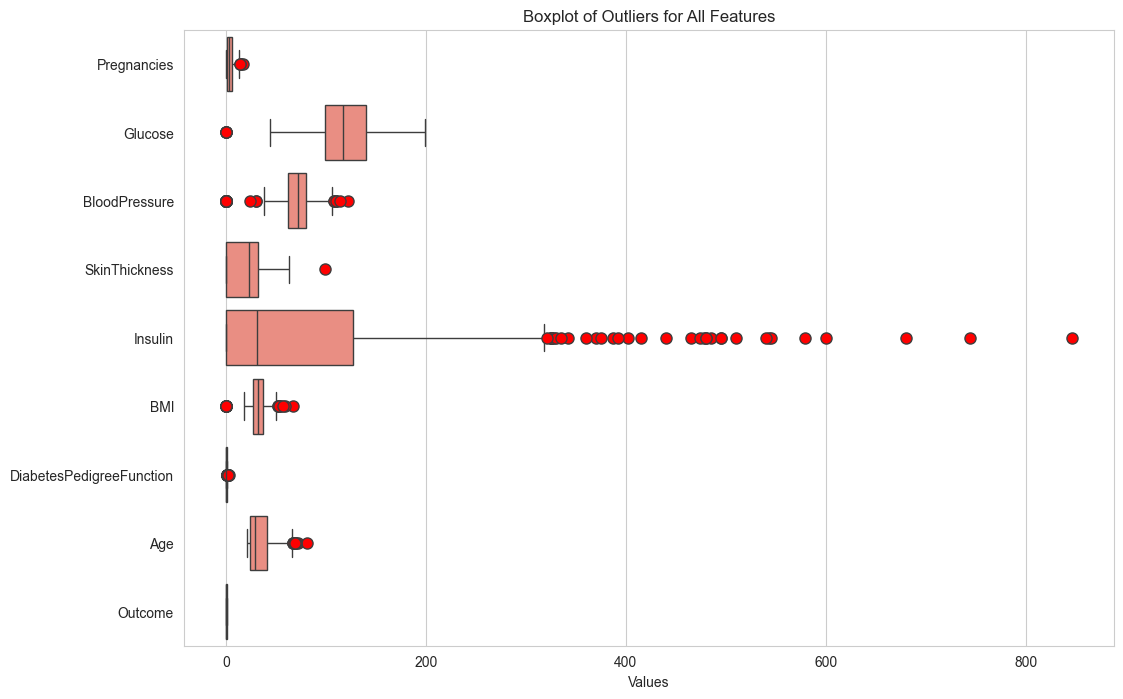

In [13]:
# Set the style
sns.set_style("whitegrid")

# Plot boxplots for all features
plt.figure(figsize=(12, 8))
sns.boxplot(data=diabetes_dataset, orient="h", color='salmon', flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Boxplot of Outliers for All Features')
plt.xlabel('Values')
plt.show()


In [14]:
def remove_outliers_except(df, exceptions):
    cleaned_df = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly

    # Iterate over columns and remove outliers, except for specified columns
    for column in df.columns:
        if column not in exceptions and df[column].dtype != 'object':  # Exclude specified columns and non-numeric columns
            Q1 = cleaned_df[column].quantile(0.25)
            Q3 = cleaned_df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remove outliers
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df

# Specify exceptions
exceptions = ['BloodPressure','Insulin','DiabetesPedigreeFunction','BMI']

# Call the function with your dataset
diabetes_dataset_cleaned = remove_outliers_except(diabetes_dataset, exceptions)
print(diabetes_dataset_cleaned.shape)


(742, 9)


### separating the data and labels

In [15]:
X = diabetes_dataset_cleaned.drop(columns = ['Outcome'], axis=1)
Y = diabetes_dataset_cleaned['Outcome']

In [16]:
Y.value_counts()

Outcome
0    485
1    257
Name: count, dtype: int64

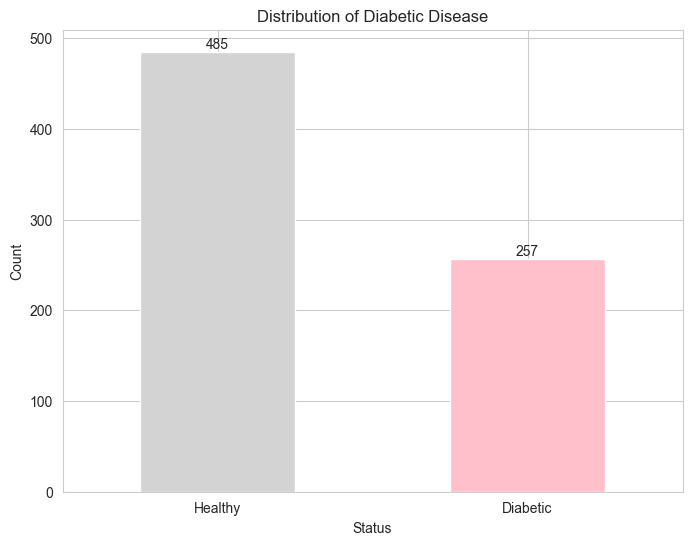

In [17]:
#bar chart of status
Y_counts = Y.value_counts().rename({1: "Diabetic", 0: "Healthy"})

# Plotting the bar plot with labeled bars and counts
ax = Y_counts.plot(kind='bar', figsize=(8, 6), color=["lightgrey", "pink"])
for i, count in enumerate(Y_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetic Disease')
plt.xticks(rotation=0)
plt.show()

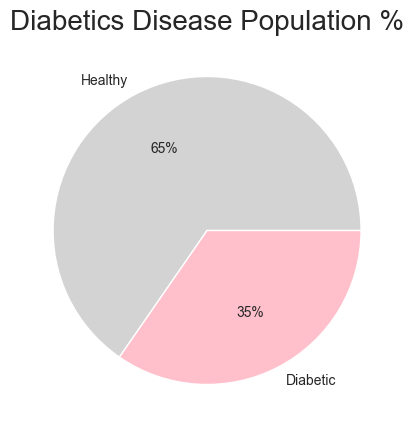

In [18]:
# Calculate % of the count of each class in the 'status' column
diabetics_count = Y.value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 5))
plt.pie(diabetics_count, labels=['Healthy', 'Diabetic'], colors=["lightgrey", "pink"], autopct='%0.0f%%')
plt.title('Diabetics Disease Population %', fontsize=20)
plt.show()


In [19]:
#mean of each feature for patients with and without diabetics
diabetes_dataset_cleaned.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.272165  110.177320      68.136082      19.973196   70.748454   
1           4.727626  141.817121      70.579767      21.875486  103.042802   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.438763                  0.430351  30.329897  
1        35.086381                  0.554296  36.385214

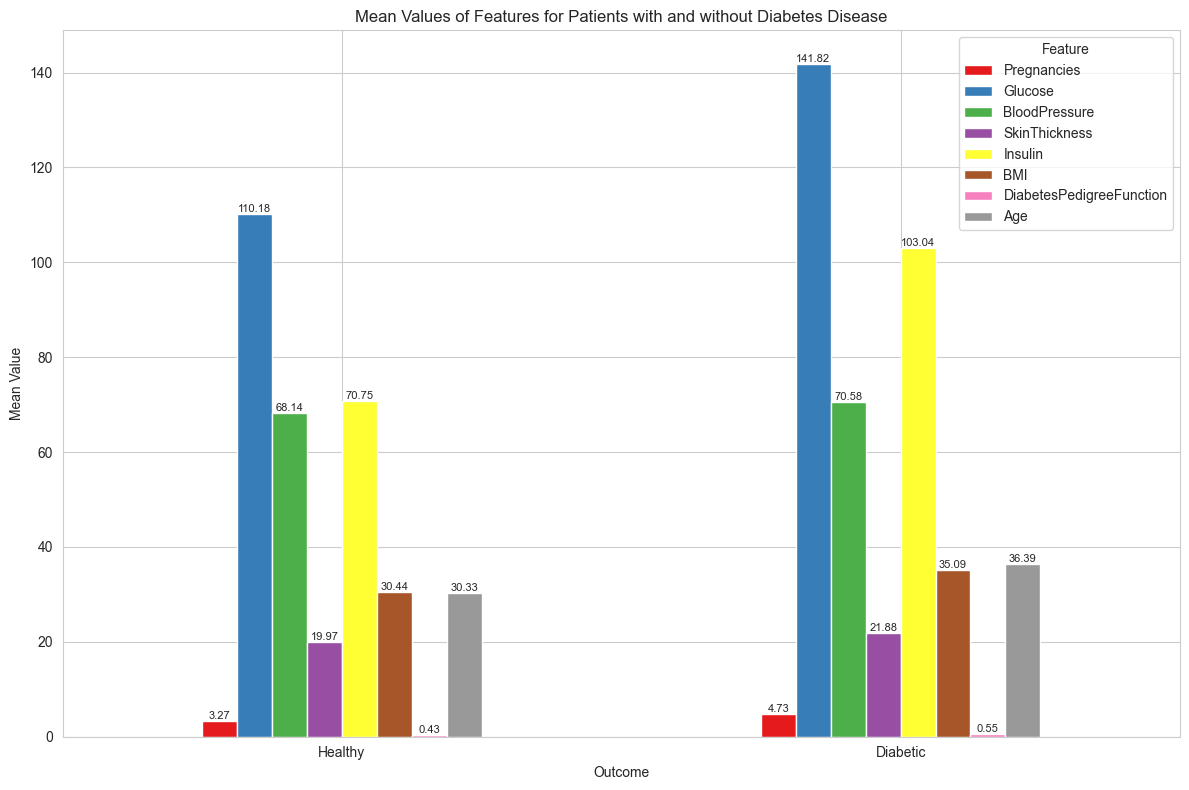

In [20]:
# Grouping by 'Outcome' and calculating the mean for each feature
mean_by_outcome = diabetes_dataset_cleaned.groupby('Outcome').mean()

# Plotting the mean values for each feature
ax = mean_by_outcome.plot(kind='bar', figsize=(12, 8), cmap='Set1')

# Loop through each bar in the plot
for bar in ax.patches:
    # Calculate the x-coordinate for the text (center of the bar)
    text_x = bar.get_x() + bar.get_width() / 2
    # Calculate the y-coordinate for the text (above the top of the bar, slightly)
    text_y = bar.get_height() + 0.02
    # Retrieve the height of the bar (mean value of the feature)
    bar_height = round(bar.get_height(), 2)
    # Add the text at the calculated position
    ax.text(text_x, text_y, bar_height, ha='center', va='bottom', fontsize=8)
# Adding title and labels to axes
plt.title('Mean Values of Features for Patients with and without Diabetes Disease')
plt.xlabel('Outcome')
plt.ylabel('Mean Value')
plt.xticks([0, 1], ['Healthy', 'Diabetic'], rotation=0)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

##Train Test Split

In [21]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,stratify=Y,random_state=42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(742, 8) (593, 8) (149, 8)


In [23]:
#Train logistic model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
Y_pred1 = model1.predict(X_test)
Y_pred1

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [25]:
input_data=[[6,156,60,29,56,35,0.325,45]]

prediction=model1.predict(input_data)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


The person is diabetic


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 77.74%


In [27]:
# accuracy score on the test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 81.88%


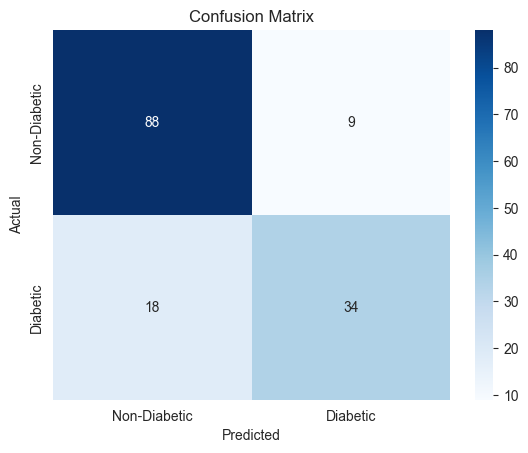

In [28]:
cm = metrics.confusion_matrix(Y_test, Y_pred1)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        97
           1       0.79      0.65      0.72        52

    accuracy                           0.82       149
   macro avg       0.81      0.78      0.79       149
weighted avg       0.82      0.82      0.81       149



### SVM

In [30]:
#Train SVM model
from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(X_train,Y_train)

SVC(kernel='linear')

In [31]:
Y_pred2 = model2.predict(X_test)
Y_pred2

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [32]:
input_data=(6,156,60,29,56,35,0.325,45)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model2.predict(input_data_reshaped)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [33]:
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 77.40%


In [34]:
# accuracy score on the test data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 79.19%


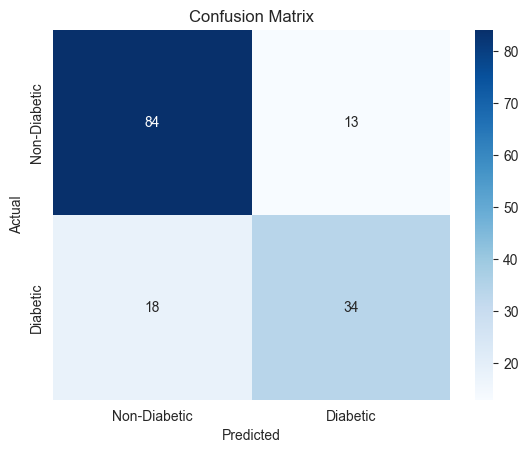

In [35]:
cm = metrics.confusion_matrix(Y_test, Y_pred2)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [36]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.72      0.65      0.69        52

    accuracy                           0.79       149
   macro avg       0.77      0.76      0.77       149
weighted avg       0.79      0.79      0.79       149



### KNN

In [37]:
k_values = np.arange(1, 22,2)  # Example range: from 1 to 20
print(k_values)
# Define an empty list to store cross-validation scores
cv_scores = []

# Perform k-fold cross-validation for each k value
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, Y_train, cv=5)  # 5-fold cross-validation
    print(scores)
    cv_scores.append(scores.mean())

[ 1  3  5  7  9 11 13 15 17 19 21]
[0.67226891 0.67226891 0.61344538 0.62711864 0.69491525]
[0.70588235 0.66386555 0.68907563 0.68644068 0.69491525]
[0.71428571 0.66386555 0.69747899 0.68644068 0.68644068]
[0.72268908 0.63865546 0.71428571 0.71186441 0.72033898]
[0.73109244 0.63865546 0.70588235 0.70338983 0.72881356]
[0.7394958  0.6302521  0.72268908 0.69491525 0.74576271]
[0.76470588 0.6302521  0.7394958  0.70338983 0.72881356]
[0.75630252 0.64705882 0.74789916 0.71186441 0.75423729]
[0.75630252 0.64705882 0.74789916 0.70338983 0.75423729]
[0.75630252 0.67226891 0.73109244 0.72033898 0.77966102]
[0.75630252 0.65546218 0.72268908 0.71186441 0.73728814]


In [38]:
optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal value of k:", optimal_k)

Optimal value of k: 19


In [39]:
# Train KNN model
model3= KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski',p=2)
model3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=19)

In [40]:
Y_pred3 = model3.predict(X_test)
Y_pred3

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [41]:
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 77.40%


In [42]:
input_data=(6,156,60,29,56,35,0.325,45)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model3.predict(input_data_reshaped)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


The person is not diabetic


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [43]:
# accuracy score on the test data
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 77.85%


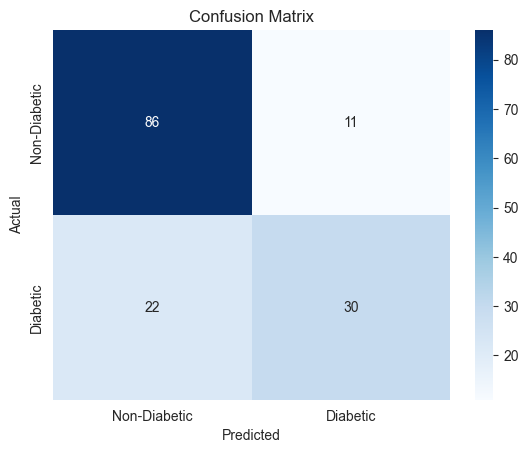

In [44]:
cm = metrics.confusion_matrix(Y_test, Y_pred3)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [45]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        97
           1       0.73      0.58      0.65        52

    accuracy                           0.78       149
   macro avg       0.76      0.73      0.74       149
weighted avg       0.77      0.78      0.77       149



### Random Forest

In [75]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': range(3,12),
	'max_leaf_nodes': range(3,12),
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_)

In [48]:
randomized_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, Y_train)
print(randomized_search.best_estimator_)

In [49]:
# Train Random Forest model
model4= RandomForestClassifier(n_estimators= 50,max_features=None, max_leaf_nodes=9,max_depth=6, criterion="gini")
model4.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)

In [50]:
Y_pred4 = model4.predict(X_test)
Y_pred4

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [51]:
input_data=(6,156,60,29,56,35,0.325,45)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model4.predict(input_data_reshaped)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


The person is diabetic


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
X_train_prediction = model4.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 82.12%


In [53]:
# accuracy score on the test data
X_test_prediction = model4.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 80.54%


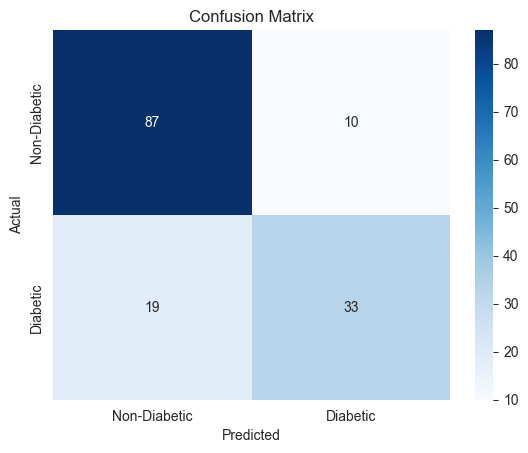

In [54]:
cm = metrics.confusion_matrix(Y_test, Y_pred4)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.77      0.63      0.69        52

    accuracy                           0.81       149
   macro avg       0.79      0.77      0.78       149
weighted avg       0.80      0.81      0.80       149



### Gradient Boosting

In [56]:
# Create a Gradient Boosting classifier with default 'deviance' loss
model5 = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50,ccp_alpha=0)

# Train the model with training data
model5.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0, n_estimators=50)

In [57]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model5, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'ccp_alpha': 0.01, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [58]:
Y_pred5 = model5.predict(X_test)
Y_pred5

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [59]:
input_data=(6,156,60,29,56,35,0.325,45)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model5.predict(input_data_reshaped)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


The person is diabetic


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [60]:
X_train_prediction = model5.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 88.03%


In [61]:
# accuracy score on the test data
X_test_prediction = model5.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 79.87%


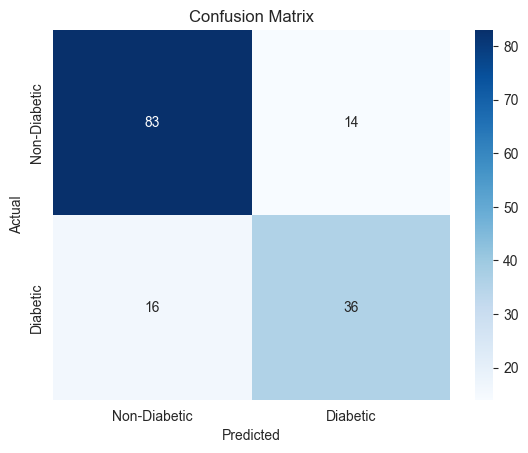

In [62]:
cm = metrics.confusion_matrix(Y_test, Y_pred5)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        97
           1       0.72      0.69      0.71        52

    accuracy                           0.80       149
   macro avg       0.78      0.77      0.78       149
weighted avg       0.80      0.80      0.80       149



### XG Boosting

In [64]:
model6 = xgb.XGBClassifier(learning_rate= 0.1,max_depth= 5)
# Train the model with training data
model6.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]

}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model6, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [66]:
Y_pred6 = model6.predict(X_test)
Y_pred6

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [67]:
input_data=(6,156,60,29,56,35,0.325,45)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model6.predict(input_data_reshaped)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


The person is diabetic


In [68]:
X_train_prediction = model6.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 98.48%


In [69]:
# accuracy score on the test data
X_test_prediction = model6.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 77.18%


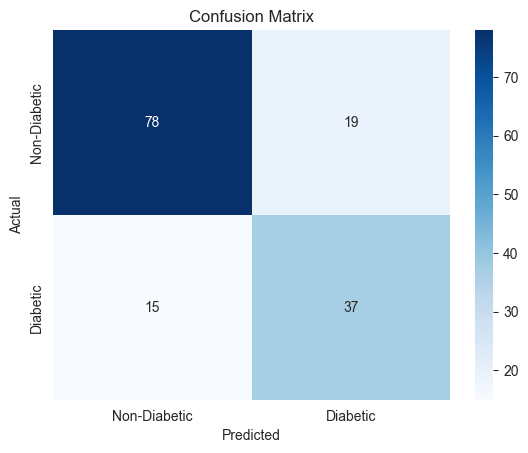

In [70]:
cm = metrics.confusion_matrix(Y_test, Y_pred6)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [71]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        97
           1       0.66      0.71      0.69        52

    accuracy                           0.77       149
   macro avg       0.75      0.76      0.75       149
weighted avg       0.78      0.77      0.77       149



### Adaboost

In [74]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model7, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [73]:
model7 = AdaBoostClassifier(n_estimators=200,learning_rate=0.1)
# Train the model with training data
model7.fit(X_train, Y_train)

C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [ ]:
Y_pred7 = model7.predict(X_test)
Y_pred7

In [ ]:
input_data=(6,156,60,29,56,35,0.325,45)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=model7.predict(input_data_reshaped)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


In [ ]:
X_train_prediction = model7.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
# accuracy score on the test data
X_test_prediction = model7.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
# filename = 'diabetes_model.sav'
#taking Gradient boosting model
pickle.dump(model5, open('diabetes_model.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('diabetes_model.pkl', 'rb'))